In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import geopandas as gpd

In [ ]:
data = pd.read_csv('/content/ODF_Fire_Occurrence_Data.csv')

In [ ]:
water_bodies = pd.read_excel('/content/Water Bodies.xlsx')


In [ ]:
water_bodies.head(10)

,longitude,latitude
0,-122.394268,42.210973
1,-122.397959,42.214342
2,-122.398731,42.213261
3,-122.399074,42.214406
4,-122.402508,42.214024
5,-122.402851,42.214787
6,-122.399675,42.215677
7,-122.401220,42.217965
8,-122.403538,42.219046
9,-122.403452,42.220317


In [ ]:
data.head(10)

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
0,102649,STAT,2015,EOA,Klamath-Lake,Klamath,15-981082-16,Bass 497,B,3.20,...,Does Not Apply - Eastern OR,09/02/2015 05:00:00 PM,09/02/2015 05:05:00 PM,09/02/2015 05:00:00 PM,09/02/2015 11:00:00 PM,09/05/2015 12:00:00 AM,10/13/2015 08:39:00 AM,98,981,082
1,131239,STAT,2022,EOA,Walker Range - WRFPA,Crescent,22-991220-23,Hay Fire,A,NaN,...,NaN,NaN,08/16/2022 06:56:00 PM,NaN,NaN,08/18/2022 12:00:00 AM,08/18/2022 09:11:00 AM,99,991,220
2,58256,STAT,2000,EOA,Central Oregon,John Day,00-952011-01,Slick Ear #2,B,0.75,...,Does Not Apply - Eastern OR,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/19/2000 01:15:00 PM,07/20/2000 12:50:00 AM,07/20/2000 09:13:00 AM,11/14/2000 09:16:00 AM,95,952,011
3,59312,STAT,2000,EOA,Northeast Oregon,La Grande,00-971024-01,Woodley,C,80.00,...,Does Not Apply - Eastern OR,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM,08/29/2000 03:59:00 PM,12/21/2000 04:22:00 PM,97,971,024
4,61657,STAT,2001,SOA,Southwest Oregon,Grants Pass,01-712133-02,QUEENS BRANCH,A,0.10,...,Lvl 3 Restricted Shutdown,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 05:45:00 PM,08/10/2001 06:30:00 PM,08/10/2001 06:42:00 PM,08/17/2001 11:45:00 AM,71,712,133
5,98529,STAT,2014,SOA,Douglas - DFPA,DFPA Central,14-733192-15,Chilcoot,A,0.01,...,Lvl 3 Restricted Shutdown,08/12/2014 06:15:00 PM,08/13/2014 04:01:00 PM,08/13/2014 04:00:00 PM,08/14/2014 06:30:00 PM,08/21/2014 12:00:00 AM,08/24/2014 11:54:00 AM,73,733,192
6,63735,STAT,2002,NOA,West Oregon,Philomath,02-551001-03,WREN,A,0.01,...,Lvl 1 Fire Season Only,07/06/2002 01:01:00 PM,07/06/2002 01:04:00 PM,07/06/2002 01:02:00 PM,07/06/2002 01:07:00 PM,07/07/2002 09:16:00 AM,07/28/2002 10:08:00 AM,55,551,001
7,68019,STAT,2003,NOA,West Oregon,Dallas,03-552013-04,Ritner Creek,A,0.01,...,Lvl 3 Restricted Shutdown,08/22/2003 04:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 09:30:00 AM,08/22/2003 04:12:00 PM,09/04/2003 09:39:00 AM,55,552,013
8,68067,STAT,2003,EOA,Northeast Oregon,Wallowa,03-974016-04,Big Tamarack,A,0.01,...,Does Not Apply - Eastern OR,08/22/2003 06:00:00 PM,08/23/2003 09:24:00 AM,08/23/2003 09:24:00 AM,08/23/2003 12:40:00 PM,08/25/2003 02:16:00 PM,09/16/2004 03:07:00 PM,97,974,016
9,68224,STAT,2003,EOA,Walker Range - WRFPA,Crescent,03-991228-04,COIDC 918,A,0.00,...,Does Not Apply - Eastern OR,08/30/2003 02:20:00 PM,08/30/2003 02:37:00 PM,08/30/2003 02:30:00 PM,08/30/2003 02:41:00 PM,09/01/2003 03:24:00 PM,09/12/2003 03:43:00 PM,99,991,228


In [ ]:
data.dtypes

Serial                      int64
FireCategory               object
FireYear                    int64
Area                       object
DistrictName               object
UnitName                   object
FullFireNumber             object
FireName                   object
Size_class                 object
EstTotalAcres             float64
Protected_Acres           float64
HumanOrLightning           object
CauseBy                    object
GeneralCause               object
SpecificCause              object
Cause_Comments             object
Lat_DD                    float64
Long_DD                   float64
LatLongDD                  object
FO_LandOwnType             object
Twn                        object
Rng                        object
Sec                       float64
Subdiv                     object
LandmarkLocation           object
County                     object
RegUseZone                 object
RegUseRestriction          object
Industrial_Restriction     object
Ign_DateTime  

## Understanding Fire Trends

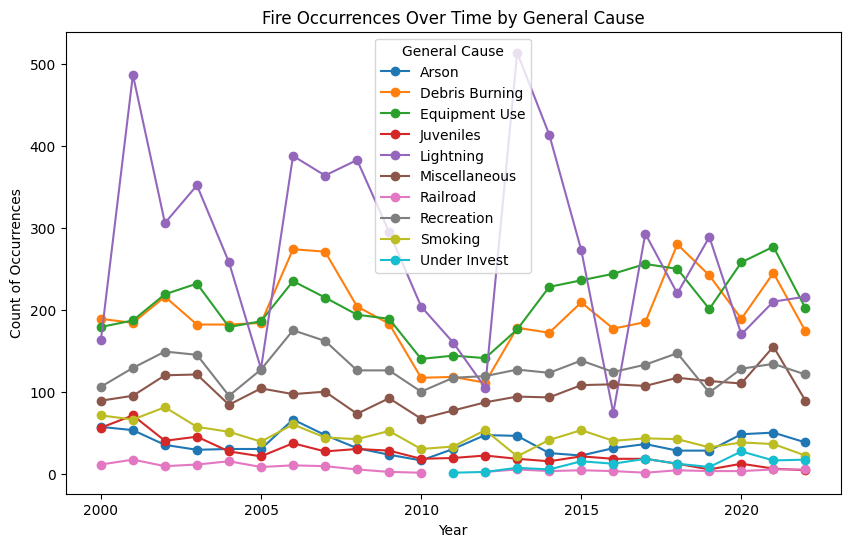

In [ ]:
fire_counts = data.groupby(['FireYear', 'GeneralCause']).size().unstack()

# Plot the line chart
fire_counts.plot(kind='line', marker='o', figsize=(10, 6))

plt.title('Fire Occurrences Over Time by General Cause')
plt.xlabel('Year')
plt.ylabel('Count of Occurrences')
plt.legend(title='General Cause')

plt.show()

## Assessing Wildfire Risks for Government Decision Makers

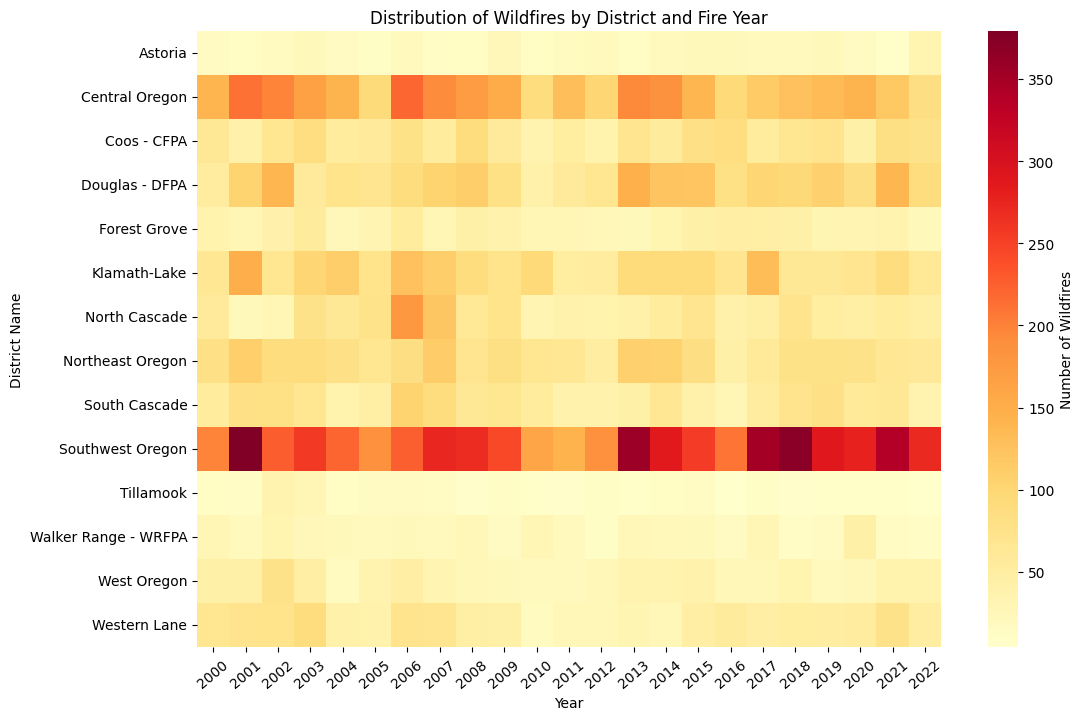

In [ ]:
# Plot 2: Heatmap showing the distribution of wildfires by district and fire year
plt.figure(figsize=(12, 8))
wildfires_by_district_year = data.pivot_table(index='DistrictName', columns='FireYear', values='Serial', aggfunc='count', fill_value=0)
sns.heatmap(wildfires_by_district_year, cmap='YlOrRd', cbar_kws={'label': 'Number of Wildfires'})
plt.title('Distribution of Wildfires by District and Fire Year')
plt.xlabel('Year')
plt.ylabel('District Name')
plt.xticks(rotation = 40)
plt.show()

## Understanding Fires Occurrences Over Time

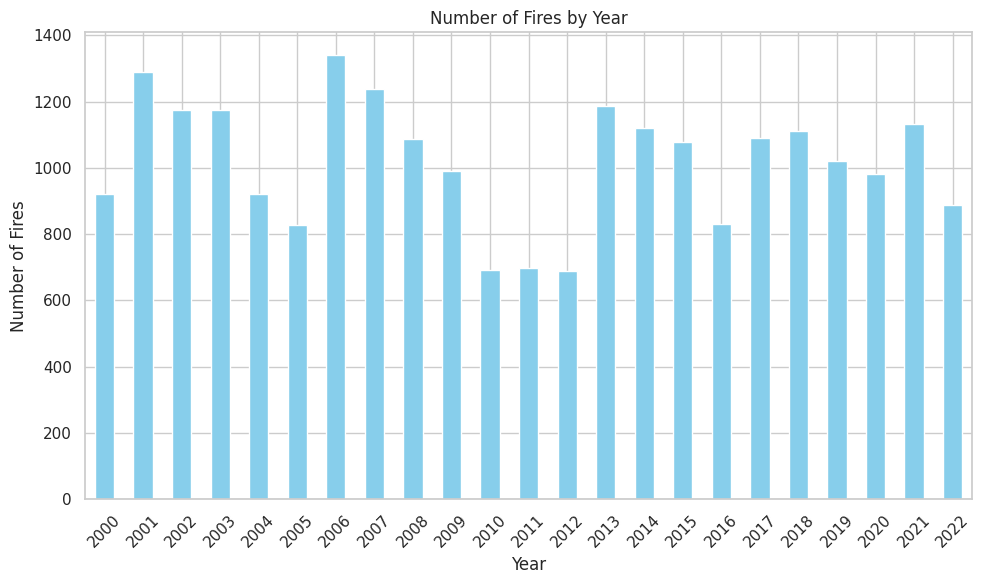

In [ ]:
fires_by_year = data['FireYear'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
fires_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Fires by Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()

## Understanding Fire Hotspots

In [ ]:
# Filter out rows with missing latitude or longitude values
data_clean = data.dropna(subset=['Lat_DD', 'Long_DD'])

# Create a map centered around the mean latitude and longitude of the wildfire data
map_center = [data_clean['Lat_DD'].mean(), data_clean['Long_DD'].mean()]
mymap = folium.Map(location=map_center, zoom_start=8)

# Create a list of latitude and longitude pairs
locations = list(zip(data_clean['Lat_DD'], data_clean['Long_DD']))

# Create a HeatMap layer and add it to the map
HeatMap(locations).add_to(mymap)

# Display the map
mymap


## Analyzing Water Body Distribution for Firefighting

In [ ]:

# Filter out rows with missing latitude or longitude values
data_clean = data.dropna(subset=['Lat_DD', 'Long_DD'])



# Convert DataFrame to GeoDataFrame
water_bodies_gdf = gpd.GeoDataFrame(water_bodies, geometry=gpd.points_from_xy(water_bodies['longitude'], water_bodies['latitude']))

# Convert the GeoDataFrame to GeoJSON format
water_bodies_geojson = water_bodies_gdf.to_json()

# Create a map centered around the mean latitude and longitude of the wildfire data
map_center = [data_clean['Lat_DD'].mean(), data_clean['Long_DD'].mean()]
mymap = folium.Map(location=map_center, zoom_start=8)

# Create a list of latitude and longitude pairs
locations = list(zip(data_clean['Lat_DD'], data_clean['Long_DD']))

# Create a HeatMap layer and add it to the map
HeatMap(locations).add_to(mymap)

# Add water bodies to the map
folium.GeoJson(water_bodies_geojson).add_to(mymap)

# Display the map
mymap


## Fire Occurrences by Unit Name

<function matplotlib.pyplot.show(close=None, block=None)>

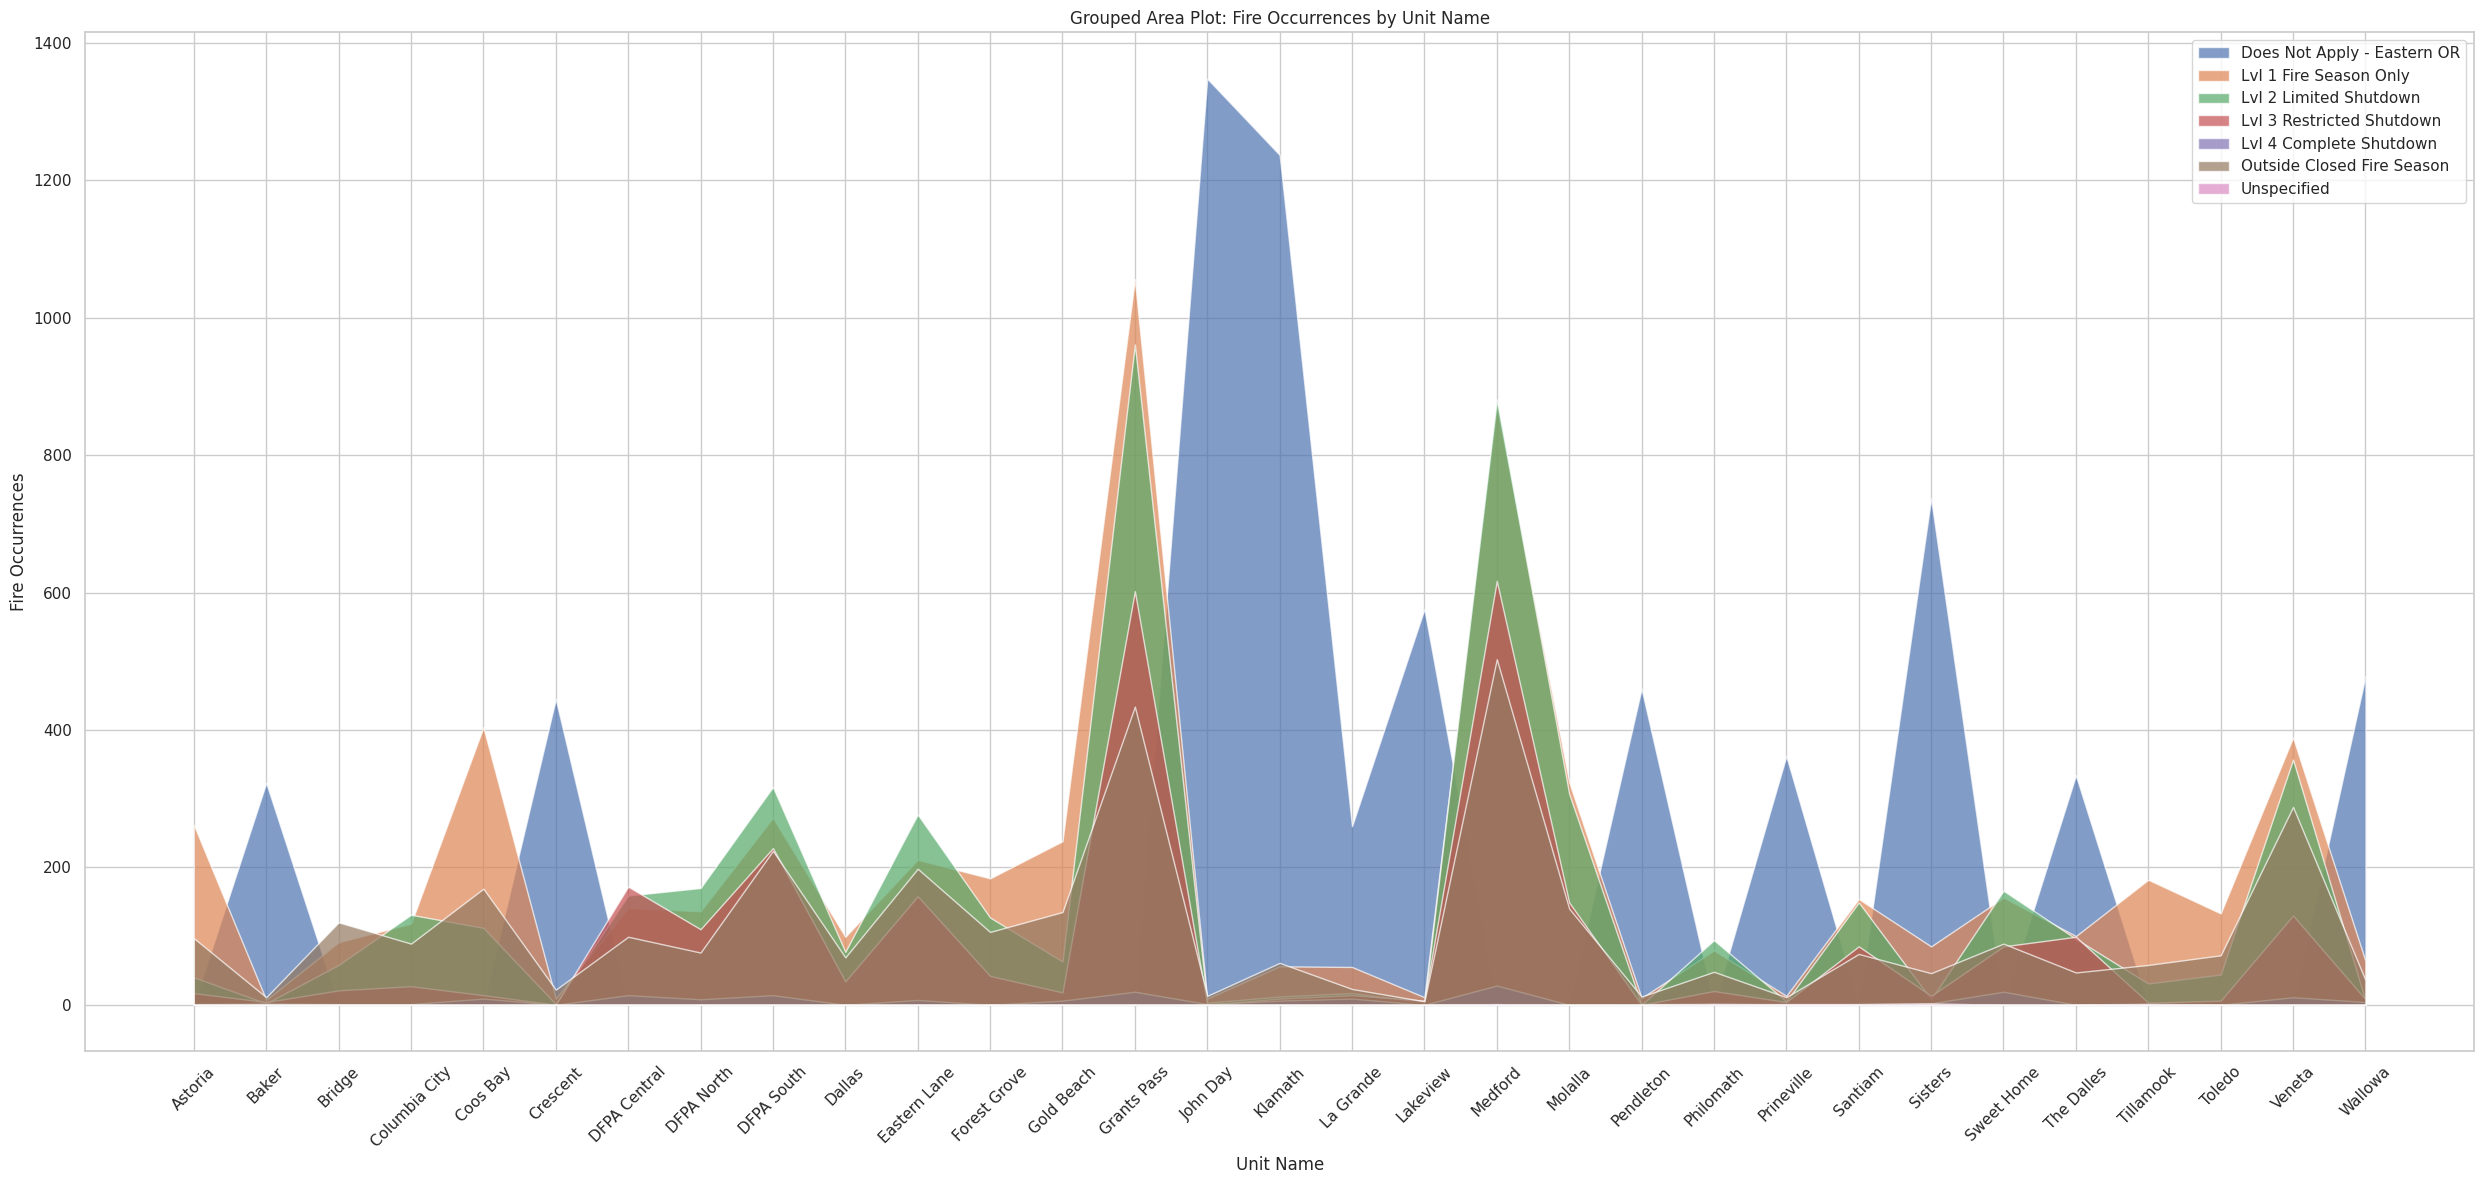

In [ ]:
# Group by 'Unit Name' and 'Industrial Restriction' and count fire occurrences
grouped_data = data.groupby(['UnitName', 'Industrial_Restriction']).size().reset_index(name='Fire Occurrences')

# Pivot the data to have 'Industrial Restriction' as columns
pivot_data = grouped_data.pivot(index='UnitName', columns='Industrial_Restriction', values='Fire Occurrences').fillna(0)

# Plot the grouped area plot
plt.figure(figsize=(25, 12))  # Increased size of the plot
for col in pivot_data.columns:
    plt.fill_between(pivot_data.index, pivot_data[col], label=col, alpha=0.7)

plt.title('Grouped Area Plot: Fire Occurrences by Unit Name')
plt.xlabel('Unit Name')
plt.ylabel('Fire Occurrences')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(loc='upper right')  # Add legend
plt.tight_layout()  # Adjust layout to prevent overlapping of points
plt.show
